In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def symm_hardlim(n):
    if n < 0:
        return -1
    else:
        return 1

In [22]:
def calculation(x,y,epoch,alpha):
    tot_err = []
    updated_weight_epoch = []
    for e in range(epoch):
        err_list = []
        updated_weight = []
        for i in range(len(x)):
            if len(updated_weight_epoch) == 0:
                w = np.zeros((2,4))
            else:
                w = updated_weight_epoch[e - 1][i]
            net = np.dot(x[i],w.T)
            ao = []
            for i in range(len(net)):
                ao.append(symm_hardlim(net[i]))
            err = y[i] - ao
            net_err = np.dot(err,err.T)
            err_list.append(net_err)
            w_new = w + 2 * alpha * net_err * x[i]
            updated_weight.append(w_new)
        tot_err.append(err_list)
        updated_weight_epoch.append(updated_weight)

    print(updated_weight_epoch[-1])
    X1 = np.arange(1,epoch + 1, 1)
    Y1 = np.array(tot_err)[:,0]
    plt.plot(X1,Y1,label = 'P1', marker = 'o')
    X2 = np.arange(1,epoch + 1, 1)
    Y2 = np.array(tot_err)[:,1]
    plt.plot(X2,Y2,label = 'P2', marker = 'o')
    plt.legend(loc = 'upper left')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.show()


In [23]:
p1 = [1,-1,1,-1]
p2 = [1,1,-1,-1]
x = np.stack((p1,p2))
x.shape

(2, 4)

In [24]:
y = np.array([[1,-1],[1,1]])
y.shape

(2, 2)

[array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])]


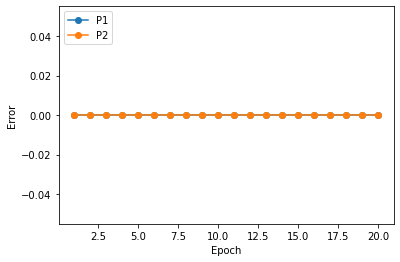

In [26]:
calculation(x,y, 20, 0.01)